## Open Weather 

1 problem: which date should I choose? It should basically be the pollution level per each patient_id right?


In [1]:
import pandas as pd
import requests
import time
import os
from datetime import datetime

# === Configuration ===
API_KEY = 'b867872dcf16fd55cff09eed822b9849'
BASE_URL = 'http://api.openweathermap.org/data/2.5/air_pollution/history'
TIME_LAPSE = 3600  # 1-hour window

# === Input & Output Paths ===
file_path = "/home/db24/irp-db24/requests/request001_006.csv"
output_dir = "/home/db24/irp-db24/results/"
output_file = os.path.join(output_dir, "pollution_results_001_006.xlsx")

# === Load and Clean CSV ===
data = pd.read_csv(file_path, na_values=['', ' ', 'N/A'])
data = data.dropna(subset=['timestamp_hour', 'latitude', 'longitude'])
data['timestamp_hour'] = pd.to_datetime(data['timestamp_hour'], utc=True)

print(f"✅ Cleaned data: {len(data)} rows to process")

# === Initialize ===
results = []
start_script_time = time.time()

# === Process Each Row ===
for i, row in data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    ts = row['timestamp_hour']

    try:
        start_time = int(ts.timestamp())
        end_time = start_time + TIME_LAPSE
    except Exception as e:
        print(f"❌ Timestamp error at row {i}: {ts} - {e}")
        continue

    url = f"{BASE_URL}?lat={lat}&lon={lon}&start={start_time}&end={end_time}&appid={API_KEY}"

    try:
        response = requests.get(url)
        if response.status_code == 200:
            pollution_data = response.json()
            if 'list' in pollution_data and len(pollution_data['list']) > 0:
                aqi = pollution_data['list'][0]['main']['aqi']
            else:
                aqi = 'N/A'
        else:
            print(f"⚠️ API status {response.status_code} at row {i}")
            aqi = 'Error'
    except Exception as e:
        print(f"❌ API error at row {i}: {e}")
        aqi = 'Error'

    results.append({
        'latitude': lat,
        'longitude': lon,
        'start_time': start_time,
        'end_time': end_time,
        'AQI': aqi
    })

    if i % 5 == 0 or i == len(data) - 1:
        elapsed = time.time() - start_script_time
        print(f"🕒 Processed row {i + 1}/{len(data)} - elapsed: {elapsed:.1f} sec")

    time.sleep(1)

# === Save Results ===
os.makedirs(output_dir, exist_ok=True)
results_df = pd.DataFrame(results)
results_df.to_excel(output_file, index=False)

# === Print Total Time ===
total_time = time.time() - start_script_time
mins, secs = divmod(total_time, 60)
print(f"✅ Done! Total time: {int(mins)} min {int(secs)} sec")


✅ Cleaned data: 48613 rows to process
🕒 Processed row 1/48613 - elapsed: 0.1 sec
🕒 Processed row 6/48613 - elapsed: 5.5 sec
🕒 Processed row 11/48613 - elapsed: 11.0 sec
🕒 Processed row 16/48613 - elapsed: 16.3 sec
🕒 Processed row 21/48613 - elapsed: 21.8 sec
🕒 Processed row 26/48613 - elapsed: 27.1 sec
🕒 Processed row 31/48613 - elapsed: 32.4 sec
🕒 Processed row 36/48613 - elapsed: 37.8 sec
🕒 Processed row 41/48613 - elapsed: 43.3 sec
🕒 Processed row 46/48613 - elapsed: 48.6 sec
🕒 Processed row 51/48613 - elapsed: 54.0 sec
🕒 Processed row 56/48613 - elapsed: 59.4 sec
🕒 Processed row 61/48613 - elapsed: 64.8 sec
🕒 Processed row 66/48613 - elapsed: 70.2 sec
🕒 Processed row 71/48613 - elapsed: 75.6 sec
🕒 Processed row 76/48613 - elapsed: 81.0 sec
🕒 Processed row 81/48613 - elapsed: 86.3 sec
🕒 Processed row 86/48613 - elapsed: 91.7 sec
🕒 Processed row 91/48613 - elapsed: 97.1 sec
🕒 Processed row 96/48613 - elapsed: 103.5 sec
🕒 Processed row 101/48613 - elapsed: 108.9 sec
🕒 Processed row 10

KeyboardInterrupt: 

In [ ]:
# import time
# import datetime

# start = int(datetime.datetime(2022, 9, 1, 0, 0).timestamp())
# end = int(datetime.datetime(2022, 9, 3, 0, 0).timestamp())


In [ ]:
# import requests

# API_key = 'b867872dcf16fd55cff09eed822b9849'
# lat = 51.51    # example: London
# lon = -0.13

# url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={API_key}"

# response = requests.get(url)

# print(response.status_code)
# print(response.json())


200
{'coord': {'lon': -0.13, 'lat': 51.51}, 'list': [{'main': {'aqi': 1}, 'components': {'co': 176.91, 'no': 0, 'no2': 6.43, 'o3': 72.96, 'so2': 2.98, 'pm2_5': 2.43, 'pm10': 6.95, 'nh3': 1.69}, 'dt': 1661986800}, {'main': {'aqi': 1}, 'components': {'co': 175.24, 'no': 0, 'no2': 5.01, 'o3': 71.53, 'so2': 2.68, 'pm2_5': 2.82, 'pm10': 8.11, 'nh3': 1.38}, 'dt': 1661990400}, {'main': {'aqi': 1}, 'components': {'co': 175.24, 'no': 0, 'no2': 4.58, 'o3': 70.1, 'so2': 2.77, 'pm2_5': 3.18, 'pm10': 8.91, 'nh3': 1.06}, 'dt': 1661994000}, {'main': {'aqi': 1}, 'components': {'co': 175.24, 'no': 0, 'no2': 4.46, 'o3': 68.66, 'so2': 2.89, 'pm2_5': 3.21, 'pm10': 8.92, 'nh3': 0.93}, 'dt': 1661997600}, {'main': {'aqi': 1}, 'components': {'co': 175.24, 'no': 0, 'no2': 4.5, 'o3': 67.95, 'so2': 3.04, 'pm2_5': 3.09, 'pm10': 8.64, 'nh3': 0.93}, 'dt': 1662001200}, {'main': {'aqi': 1}, 'components': {'co': 175.24, 'no': 0, 'no2': 4.67, 'o3': 67.95, 'so2': 3.19, 'pm2_5': 3.03, 'pm10': 8.47, 'nh3': 1.01}, 'dt': 16

In [ ]:
# import json

# # Save response JSON to a file
# with open('air_pollution.json', 'w') as f:
#     json.dump(response.json(), f, indent=2)


In [ ]:
# import os
# print(os.getcwd())


/home/db24/irp-db24


In [ ]:
# import json
# import pandas as pd
# from datetime import datetime

# # Load full JSON from file
# with open('/home/db24/irp-db24/air_pollution.json') as f:
#     full_json = json.load(f)

# # Extract the list of pollution records
# pollution_records = full_json['list']

# # Normalize the nested structure into a flat table
# df = pd.json_normalize(pollution_records)

# # Convert Unix timestamps to readable datetime
# df['datetime'] = pd.to_datetime(df['dt'], unit='s')


# # Check result
# print(df.head())


           dt  main.aqi  components.co  components.no  components.no2  \
0  1661986800         1         176.91            0.0            6.43   
1  1661990400         1         175.24            0.0            5.01   
2  1661994000         1         175.24            0.0            4.58   
3  1661997600         1         175.24            0.0            4.46   
4  1662001200         1         175.24            0.0            4.50   

   components.o3  components.so2  components.pm2_5  components.pm10  \
0          72.96            2.98              2.43             6.95   
1          71.53            2.68              2.82             8.11   
2          70.10            2.77              3.18             8.91   
3          68.66            2.89              3.21             8.92   
4          67.95            3.04              3.09             8.64   

   components.nh3            datetime  
0            1.69 2022-08-31 23:00:00  
1            1.38 2022-09-01 00:00:00  
2            1

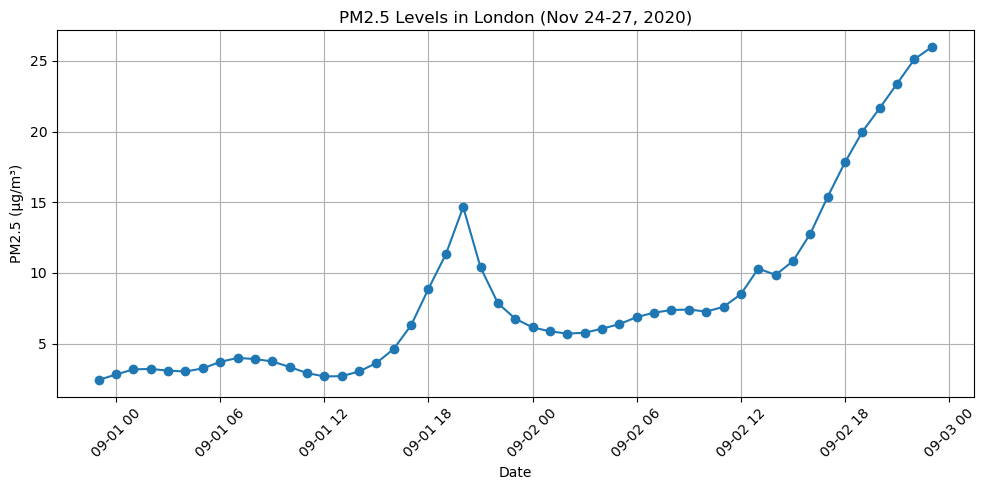

In [ ]:
# ## Plot the level ofpm_2.5 in London over the 3 days
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 5))
# plt.plot(df['datetime'], df['components.pm2_5'], marker='o', linestyle='-')
# plt.title('PM2.5 Levels in London (Nov 24-27, 2020)')
# plt.xlabel('Date')
# plt.ylabel('PM2.5 (µg/m³)')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()

In [ ]:
# import folium
# import branca
# import pandas as pd
# import time
# import numpy as np
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# ## PM 2.5 levels in the UK

# API_KEY = 'b867872dcf16fd55cff09eed822b9849'
# lat_min, lat_max = 50.0 , 52.5   # ~50.5°N → 52.5°N
# lon_min, lon_max = -1.3, 1.3      # ~–1.3° → +1.3°E

# # 1. define your grid (e.g. 25×25 → ~1.7 km spacing)
# n = 25
# lats = np.linspace(lat_min, lat_max, n)
# lons = np.linspace(lon_min, lon_max, n)
# coords = [(lat, lon) for lat in lats for lon in lons]

# # 2. define your time window
# now = int(time.time())
# start = now - 3600   # one hour ago
# end   = now

# results = []
# for lat, lon in coords:
#     # choose your endpoint:
#     # ■ FREE tier: current snapshot
#     url = "http://api.openweathermap.org/data/2.5/air_pollution"
#     params = {"lat": lat, "lon": lon, "appid": API_KEY}
    

#     r = requests.get(url, params=params)
#     if r.status_code != 200:
#         continue
    
#     data = r.json().get("list", [])
#     if not data:
#         continue
    
#     if "history" in url:
#         # average over the returned hour
#         pm25_vals = [pt["components"]["no2"] for pt in data]
#         pm25 = float(np.mean(pm25_vals))
#     else:
#         # single‐point snapshot
#         pm25 = data[0]["components"]["pm2_5"]
    
#     results.append({"lat": lat, "lon": lon, "no2": pm25})

# df = pd.DataFrame(results)


# # --- 2) Build a colormap from your data range ---
# vmin, vmax = df.pm2_5.min(), df.pm2_5.max()
# colormap = branca.colormap.LinearColormap(
#     ['lightblue','blue','darkblue'],  # low→mid→high
#     vmin=vmin, vmax=vmax,
#     caption="PM₂.₅ (µg/m³)"
# )

# # --- 3) Initialize the map ---
# m = folium.Map(location=[df.lat.mean(), df.lon.mean()], zoom_start=10, tiles="CartoDB positron")

# # --- 4) Add a CircleMarker for each point ---
# for _, row in df.iterrows():
#     folium.CircleMarker(
#         location=(row.lat, row.lon),
#         radius=6,
#         weight=0.5,
#         color='white',
#         fill=True,
#         fill_color=colormap(row.pm2_5),
#         fill_opacity=0.3,
#         tooltip=f"PM₂.₅: {row.pm2_5:.1f} µg/m³"
#     ).add_to(m)

# # --- 5) Add the legend (colormap) and show ---
# colormap.add_to(m)

# m 


In [ ]:
# df

,lat,lon,pm2_5
0,51.28,-0.500000,9.92
1,51.28,-0.466667,9.92
2,51.28,-0.433333,9.92
3,51.28,-0.400000,9.92
4,51.28,-0.366667,9.46
...,...,...,...
620,51.70,0.166667,8.09
621,51.70,0.200000,8.09
622,51.70,0.233333,8.47
623,51.70,0.266667,8.47


In [ ]:
# import time
# import numpy as np
# import requests
# import pandas as pd
# import folium
# import branca

# API_KEY = 'b867872dcf16fd55cff09eed822b9849'
# lat_min, lat_max = 50.0, 52.5    # ~50.0°N → 52.5°N
# lon_min, lon_max = -1.3, 1.3     # ~–1.3° → +1.3°E

# # 1. define your grid (25×25)
# n = 25
# lats = np.linspace(lat_min, lat_max, n)
# lons = np.linspace(lon_min, lon_max, n)
# coords = [(lat, lon) for lat in lats for lon in lons]

# # 2. fetch AQI at each point
# records = []
# for lat, lon in coords:
#     r = requests.get(
#         "http://api.openweathermap.org/data/2.5/air_pollution",
#         params={"lat": lat, "lon": lon, "appid": API_KEY}
#     )
#     if not r.ok:
#         continue
#     lst = r.json().get("list", [])
#     if not lst:
#         continue
#     aqi = lst[0]["main"]["aqi"]  # 1–5
#     records.append({"lat": lat, "lon": lon, "aqi": aqi})

# df = pd.DataFrame(records)

# # 3. build a discrete colormap for AQI categories 1→5
# aqi_cmap = branca.colormap.StepColormap(
#     colors=['green','yellow','orange','red','purple'],
#     index=[1,2,3,4,5],
#     vmin=1, vmax=5,
#     caption="Air Quality Index (1=Good → 5=Very Poor)"
# )

# # 4. init map
# m = folium.Map(location=[df.lat.mean(), df.lon.mean()], zoom_start=10, tiles="CartoDB positron")

# # 5. plot circles sized and coloured by AQI
# for _, row in df.iterrows():
#     folium.CircleMarker(
#         location=(row.lat, row.lon),
#         radius=5 + row.aqi,               # slightly larger for worse AQI
#         fill=True,
#         fill_color=aqi_cmap(row.aqi),
#         fill_opacity=0.7,
#         stroke=False,
#         tooltip=f"AQI: {row.aqi}"
#     ).add_to(m)

# # 6. add legend
# aqi_cmap.add_to(m)

# m  # in Jupyter this will render the interactive AQI map


In [ ]:
# ## Plotting no2
# import time
# import numpy as np
# import requests
# import pandas as pd
# import folium
# import branca

# API_KEY = 'b867872dcf16fd55cff09eed822b9849'

# # 1) Define your sampling box and grid density
# lat_min, lat_max = 51.28, 51.70
# lon_min, lon_max = -0.50, 0.30

# # keep a 25×25 grid (≈0.017° steps, ~1.8 km apart)
# n = 25
# lats = np.linspace(lat_min, lat_max, n)
# lons = np.linspace(lon_min, lon_max, n)
# coords = [(lat, lon) for lat in lats for lon in lons]

# # 2) Fetch NO2 at each grid point
# records = []
# for lat, lon in coords:
#     r = requests.get(
#         "http://api.openweathermap.org/data/2.5/air_pollution",
#         params={"lat": lat, "lon": lon, "appid": API_KEY}
#     )
#     if not r.ok:
#         continue
#     lst = r.json().get("list", [])
#     if not lst:
#         continue
#     no2 = lst[0]["components"]["no2"]
#     records.append({"lat": lat, "lon": lon, "no2": no2})

# df = pd.DataFrame(records)

# # 3) Build a continuous colormap for NO2
# vmin, vmax = df.no2.min(), df.no2.max()
# cmap = branca.colormap.LinearColormap(
#     ['lightgreen','green','darkgreen'],
#     vmin=vmin, vmax=vmax,
#     caption="NO₂ (µg/m³)"
# )



In [ ]:
# # 4) Initialize the map
# m = folium.Map(
#     location=[df.lat.mean(), df.lon.mean()],
#     zoom_start=8,
#     tiles="CartoDB positron"
# )

# # 5) Plot each point as a circle colored by NO2
# for _, row in df.iterrows():
#     folium.CircleMarker(
#         location=(row.lat, row.lon),
#         radius=6,
#         fill=True,
#         fill_color=cmap(row.no2),
#         fill_opacity=0.3,
#         tooltip=f"NO₂: {row.no2:.1f} µg/m³"
#     ).add_to(m)

# # 6) Add the legend and render
# cmap.add_to(m)
# m  # in a Jupyter notebook this will display the interactive map

# 5) Plot circles with radius scaled by NO₂
scaling_factor = 0.2  # Adjust to control circle sizes
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row.lat, row.lon),
        radius=row.no2 * scaling_factor,  # Dynamic radius
        fill=True,
        fill_color=cmap(row.no2),
        fill_opacity=0.7,  # Less transparency for better visibility
        tooltip=f"NO₂: {row.no2:.1f} µg/m³"
    ).add_to(m)

m

TypeError: Object of type function is not JSON serializable

In [ ]:
# import numpy as np
# import requests
# import pandas as pd
# import folium
# import branca
# from shapely.geometry import Polygon, Point
# import geopandas as gpd

# API_KEY = 'b867872dcf16fd55cff09eed822b9849'

# # 1) Define Greater-London box and grid
# lat_min, lat_max = 51.28, 51.70
# lon_min, lon_max = -0.50, 0.30
# step = (lat_max - lat_min) / 24  # ~0.017° for 25×25

# lats = np.linspace(lat_min, lat_max, 25)
# lons = np.linspace(lon_min, lon_max, 25)
# coords = [(lat, lon) for lat in lats for lon in lons]

# # 2) Fetch NO₂
# records = []
# for lat, lon in coords:
#     r = requests.get(
#         "http://api.openweathermap.org/data/2.5/air_pollution",
#         params={"lat": lat, "lon": lon, "appid": API_KEY}
#     )
#     if not r.ok:
#         continue
#     lst = r.json().get("list", [])
#     if not lst:
#         continue
#     records.append({
#         "lat": lat,
#         "lon": lon,
#         "no2": lst[0]["components"]["no2"]
#     })

# df = pd.DataFrame(records)

# # 3) Build grid-cell polygons and inside/outside flag
# polys, no2_vals, inside_flags = [], [], []
# half = step / 2

# for _, r in df.iterrows():
#     lat, lon, no2 = r.lat, r.lon, r.no2
#     ll = (lon-half, lat-half)
#     lr = (lon+half, lat-half)
#     ur = (lon+half, lat+half)
#     ul = (lon-half, lat+half)
#     polys.append(Polygon([ll, lr, ur, ul]))
#     no2_vals.append(no2)
#     # inside if within the London box
#     inside_flags.append(
#         (lat_min <= lat <= lat_max) and (lon_min <= lon <= lon_max)
#     )

# gdf = gpd.GeoDataFrame({
#     "no2": no2_vals,
#     "inside": inside_flags
# }, geometry=polys, crs="EPSG:4326")

# # 4) Diverging colormap centered on mean NO₂
# mean_no2 = gdf.no2.mean()
# vmin, vmax = gdf.no2.min(), gdf.no2.max()
# divcmap = branca.colormap.LinearColormap(
#     ["blue","white","red"],
#     vmin=vmin, vmax=vmax,
#     caption="NO₂ (µg/m³)"
# ).to_step(9)
# divcmap.center = mean_no2

# # 5) Folium map
# m = folium.Map(
#     location=[(lat_min+lat_max)/2, (lon_min+lon_max)/2],
#     zoom_start=11,
#     tiles="CartoDB positron"
# )

# # 6) Draw Greater-London boundary rectangle
# folium.Rectangle(
#     bounds=[[lat_min, lon_min], [lat_max, lon_max]],
#     color="black", weight=2, fill=False
# ).add_to(m)

# # 7) Overlay grid cells with style and tooltip
# folium.GeoJson(
#     data=gdf.__geo_interface__,
#     style_function=lambda feat: {
#         "fillColor": divcmap(feat["properties"]["no2"]),
#         "color": "gray",
#         "weight": 0.2,
#         "fillOpacity": 0.7
#     },
#     tooltip=folium.GeoJsonTooltip(
#         fields=["no2","inside"],
#         aliases=["NO₂ (µg/m³):","Inside London?"],
#         localize=True
#     )
# ).add_to(m)

# # 8) Legend
# divcmap.add_to(m)

# m  # renders inline in Jupyter


In [ ]:
# import numpy as np
# import requests
# import pandas as pd
# import folium
# import branca
# from shapely.geometry import Polygon
# import geopandas as gpd

# API_KEY = 'b867872dcf16fd55cff09eed822b9849'

# # 1) Define Greater-London box and 25×25 grid
# lat_min, lat_max = 51.28, 51.70
# lon_min, lon_max = -0.50, 0.30
# step = (lat_max - lat_min) / 24  # ~0.017° steps

# lats = np.linspace(lat_min, lat_max, 25)
# lons = np.linspace(lon_min, lon_max, 25)
# coords = [(lat, lon) for lat in lats for lon in lons]

# # 2) Fetch NO₂ at each grid point
# records = []
# for lat, lon in coords:
#     r = requests.get(
#         "http://api.openweathermap.org/data/2.5/air_pollution",
#         params={"lat": lat, "lon": lon, "appid": API_KEY}
#     )
#     if not r.ok:
#         continue
#     lst = r.json().get("list", [])
#     if not lst:
#         continue
#     records.append({
#         "lat": lat,
#         "lon": lon,
#         "no2": lst[0]["components"]["no2"]
#     })

# df = pd.DataFrame(records)

# # 3) Build square polygons and flag inside/outside
# polys, no2_vals, inside = [], [], []
# half = step / 2
# for _, row in df.iterrows():
#     lat, lon, no2 = row.lat, row.lon, row.no2
#     ll = (lon-half, lat-half)
#     lr = (lon+half, lat-half)
#     ur = (lon+half, lat+half)
#     ul = (lon-half, lat+half)
#     polys.append(Polygon([ll, lr, ur, ul]))
#     no2_vals.append(no2)
#     inside.append(lat_min <= lat <= lat_max and lon_min <= lon <= lon_max)

# gdf = gpd.GeoDataFrame({
#     "no2": no2_vals,
#     "inside": inside
# }, geometry=polys, crs="EPSG:4326")

# # 4) Define a step‐colormap: lightblue ≤6; ramp to red at 8; darkred ≥10
# vmin, vmax = gdf.no2.min(), gdf.no2.max()
# colormap = branca.colormap.StepColormap(
#     colors=['lightblue', 'lightblue', 'red', 'darkred'],
#     index=[vmin, 6, 8, 10],
#     vmin=vmin, vmax=vmax,
#     caption="NO₂ (µg/m³)"
# )

# # 5) Create Folium map
# m = folium.Map(
#     location=[(lat_min+lat_max)/2, (lon_min+lon_max)/2],
#     zoom_start=11,
#     tiles="CartoDB positron"
# )

# # 6) Draw London bounding box
# folium.Rectangle(
#     bounds=[[lat_min, lon_min], [lat_max, lon_max]],
#     color="black", weight=2, fill=False
# ).add_to(m)

# # 7) Overlay grid cells with custom coloring & tooltip
# folium.GeoJson(
#     data=gdf.__geo_interface__,
#     style_function=lambda feat: {
#         "fillColor": colormap(feat["properties"]["no2"]),
#         "color": "gray",
#         "weight": 0.2,
#         "fillOpacity": 0.7
#     },
#     tooltip=folium.GeoJsonTooltip(
#         fields=["no2","inside"],
#         aliases=["NO₂ (µg/m³):","Inside London?"],
#         localize=True
#     )
# ).add_to(m)

# # 8) Add the legend
# colormap.add_to(m)

# # 9) Display (in Jupyter) or save to HTML
# m.save("london_no2_custom.html")
# m  # Renders inline in a notebook


In [ ]:
# import numpy as np
# import requests
# import pandas as pd
# import folium
# import branca
# from shapely.geometry import Polygon
# import geopandas as gpd

# API_KEY = 'b867872dcf16fd55cff09eed822b9849'

# # 1) Define your London‐focused grid
# lat_min, lat_max = 51.28, 51.70
# lon_min, lon_max = -0.50, 0.30
# step = (lat_max - lat_min) / 24  # ~0.017° for a 25×25 grid

# lats = np.linspace(lat_min, lat_max, 25)
# lons = np.linspace(lon_min, lon_max, 25)
# coords = [(lat, lon) for lat in lats for lon in lons]

# # 2) Fetch NO2
# records = []
# for lat, lon in coords:
#     r = requests.get(
#         "http://api.openweathermap.org/data/2.5/air_pollution",
#         params={"lat": lat, "lon": lon, "appid": API_KEY}
#     )
#     if not r.ok: continue
#     lst = r.json().get("list", [])
#     if not lst: continue
#     records.append({
#         "lat": lat,
#         "lon": lon,
#         "no2": lst[0]["components"]["no2"]
#     })
# df = pd.DataFrame(records)

# # 3) Build square polygons around each point
# polys, vals = [], []
# half = step/2
# for _, row in df.iterrows():
#     lat, lon = row.lat, row.lon
#     ll = (lon - half, lat - half)
#     lr = (lon + half, lat - half)
#     ur = (lon + half, lat + half)
#     ul = (lon - half, lat + half)
#     polys.append(Polygon([ll, lr, ur, ul]))
#     vals.append(row.no2)

# gdf = gpd.GeoDataFrame({"no2": vals}, geometry=polys, crs="EPSG:4326")

# # 4) Colormap
# vmin, vmax = gdf.no2.min(), gdf.no2.max()
# cmap = branca.colormap.LinearColormap(
#     ['lightgreen','green','darkgreen'],
#     vmin=vmin, vmax=vmax,
#     caption="NO₂ (µg/m³)"
# )

# # 5) Folium map + grid‐cell overlay
# m = folium.Map(location=[51.5, -0.1], zoom_start=10, tiles="CartoDB positron")

# folium.GeoJson(
#     data=gdf.__geo_interface__,
#     style_function=lambda feature: {
#         "fillColor": cmap(feature["properties"]["no2"]),
#         "color": "white",
#         "weight": 0.2,
#         "fillOpacity": 0.7
#     },
#     tooltip=folium.GeoJsonTooltip(
#         fields=["no2"],
#         aliases=["NO₂"],
#         localize=True
#     )
# ).add_to(m)

# cmap.add_to(m)
# m  # in Jupyter this will render the interactive map


In [ ]:
# import time
# import numpy as np
# import requests
# import pandas as pd

# API_KEY = 'YOUR_KEY_HERE'
# lat_min, lat_max = 50.0, 52.5
# lon_min, lon_max = -1.3, 1.3

# # build a coarse grid
# n = 15
# lats = np.linspace(lat_min, lat_max, n)
# lons = np.linspace(lon_min, lon_max, n)
# coords = [(lat, lon) for lat in lats for lon in lons]

# # define the hour window
# now   = int(time.time())
# start = now - 3600
# end   = now

# records = []
# for lat, lon in coords:
#     r = requests.get(
#         "http://api.openweathermap.org/data/2.5/air_pollution/history",
#         params={"lat": lat, "lon": lon, "start": start, "end": end, "appid": API_KEY}
#     )
#     if not r.ok:
#         continue
#     hours = r.json().get("list", [])
#     if not hours:
#         continue

#     # pull each pollutant & AQI into arrays
#     aqi_vals   = [h["main"]["aqi"]           for h in hours]
#     pm25_vals  = [h["components"]["pm2_5"]   for h in hours]
#     pm10_vals  = [h["components"]["pm10"]    for h in hours]
#     no2_vals   = [h["components"]["no2"]     for h in hours]
#     o3_vals    = [h["components"]["o3"]      for h in hours]

#     # average them
#     record = {
#         "lat":   lat,
#         "lon":   lon,
#         "aqi":   np.mean(aqi_vals),
#         "pm2_5": np.mean(pm25_vals),
#         "pm10":  np.mean(pm10_vals),
#         "no2":   np.mean(no2_vals),
#         "o3":    np.mean(o3_vals),
#     }
#     records.append(record)

# df = pd.DataFrame(records)
# print(df.describe())
